In [4]:
import pandas as pd

churn_df = pd.read_csv('telecom_churn_clean.csv')
churn_df.head(20)

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,5,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,6,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,7,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,8,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,9,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [5]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [6]:
import numpy as np

X_new = np.array([[30.0, 17.5],
[107.0, 24.1],
[213.0, 10.9]])

In [8]:
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred))

Predictions: [0 1 0]


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.852


In [10]:
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1, 26)

for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train, y_train)

  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)

In [12]:
%pip install matplotlib

     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     ----------- --------------------------- 30.7/104.0 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 104.0/104.0 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
    --------------------------------------- 0.2/8.1 MB 4.6 MB/s eta 0:00:02
   --- ------------------------------------ 0.6/8.1 MB 8.1 MB/s eta 0:00:01
   ----- ---------------------------------- 1.2/8.1 MB 9.4 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/8.1 MB 9.9 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/8.1 MB 10.4 MB/s eta 0:00:01
   ------------- -------------------------- 2.8/8.1 MB 10.5 MB/s eta 0:00:01
   ---------------- ----------------------- 3.3/8.1 MB 10.7 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.1 MB 10.8 MB/s eta 0:00:01
   --------------------- ------------------ 4.4/8.1 MB 10.9 MB/s eta 0:00:01
   ------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Rhayner\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


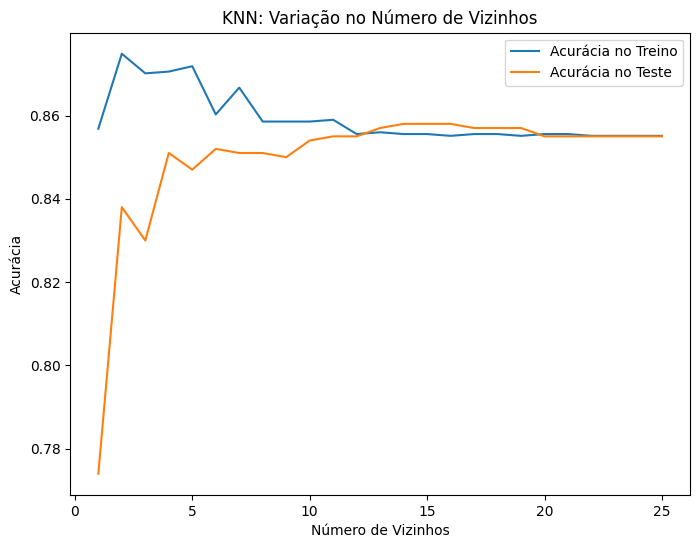

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title("KNN: Variação no Número de Vizinhos")

plt.plot(neighbors, train_accuracies.values(), label="Acurácia no Treino")
plt.plot(neighbors, test_accuracies.values(), label="Acurácia no Teste")

plt.legend()
plt.xlabel("Número de Vizinhos")
plt.ylabel("Acurácia")
plt.show()

In [14]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


In [17]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Create neighbors
neighbors = np.arange(1, 13)  # Array de 1 até 12, inclusive
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X_train, y_train)
  
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# Print results
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)


[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.8885971492873218, np.int64(3): 0.8994748687171793, np.int64(4): 0.8750937734433608, np.int64(5): 0.878469617404351, np.int64(6): 0.8660915228807202, np.int64(7): 0.8705926481620405, np.int64(8): 0.8615903975993998, np.int64(9): 0.86384096024006, np.int64(10): 0.858589647411853, np.int64(11): 0.8604651162790697, np.int64(12): 0.8574643660915229} 
 {np.int64(1): 0.7856071964017991, np.int64(2): 0.8470764617691154, np.int64(3): 0.8320839580209896, np.int64(4): 0.856071964017991, np.int64(5): 0.8545727136431784, np.int64(6): 0.8590704647676162, np.int64(7): 0.8605697151424287, np.int64(8): 0.8620689655172413, np.int64(9): 0.863568215892054, np.int64(10): 0.8605697151424287, np.int64(11): 0.8605697151424287, np.int64(12): 0.8605697151424287}


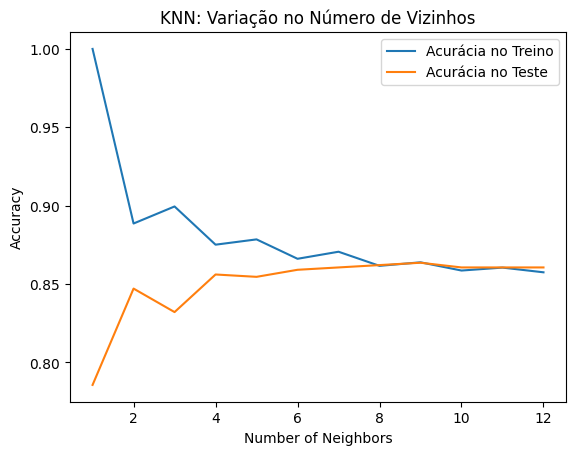

In [18]:
import matplotlib.pyplot as plt

# Add a title
plt.title("KNN: Variação no Número de Vizinhos")

# Plot training accuracies
plt.plot(neighbors, list(train_accuracies.values()), label="Acurácia no Treino")

# Plot test accuracies
plt.plot(neighbors, list(test_accuracies.values()), label="Acurácia no Teste")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()
